# Installation of required libraries and basic setup

In [2]:
# !pip install tensorflow

In [3]:
# !pip install matplotlib

In [4]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [5]:
import os

# Testing the dataset 

In [6]:
# Testing the dataset 
path_single = r"C:\Users\myada\OneDrive\Desktop\Satelite_Segmentation\TrainData\img\image_1.h5"
path_single_mask = r'C:\Users\myada\OneDrive\Desktop\Satelite_Segmentation\TrainData\mask\mask_1.h5'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


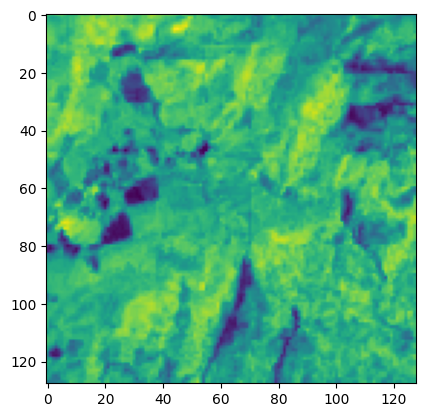

In [7]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


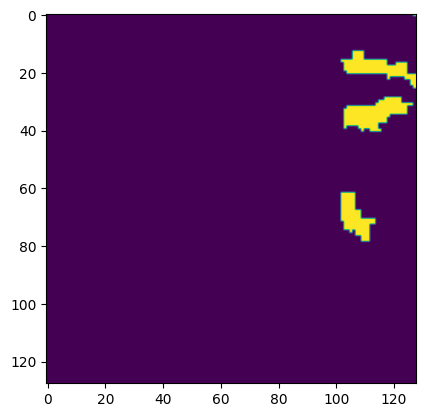

In [8]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

# Using all dataset

In [9]:
# path_single = r"data/img/image_10.h5"
# path_single_mask = r'data/mask/mask_1.h5'
TRAIN_PATH = r"C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\\*.h5"
TRAIN_MASK = r'C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\\*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))


## Train with RGB, NDVI, DEM, and Slope 


In [10]:
#testing for google colab GPU
import tensorflow as tf
tf.test.gpu_device_name()

''

In [11]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_1.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_1.h5
1 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_10.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_10.h5
2 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_100.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_100.h5
3 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_1000.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_1000.h5
4 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_1001.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_1001.h5
5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_1002.h5 C:\\Users\\myada\\One

C:\Users\myada\AppData\Local\Temp\ipykernel_19608\3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1672 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_2503.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_2503.h5
1673 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_2504.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_2504.h5
1674 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_2505.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_2505.h5
1675 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_2506.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_2506.h5
1676 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_2507.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_2507.h5
1677 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image

C:\Users\myada\AppData\Local\Temp\ipykernel_19608\3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2269 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_3040.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_3040.h5
2270 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_3041.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_3041.h5
2271 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_3042.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_3042.h5
2272 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_3043.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_3043.h5
2273 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image_3044.h5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\mask\mask_3044.h5
2274 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\TrainData\\img\image

## Testing min, max values in train data

In [12]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


## Custom loss function (Dice Loss)

In [13]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

## Visualization of the training data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


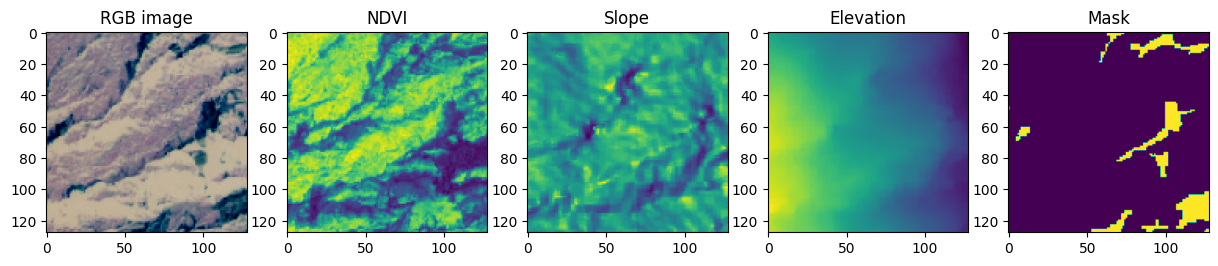

In [14]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

## Validation split

In [15]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


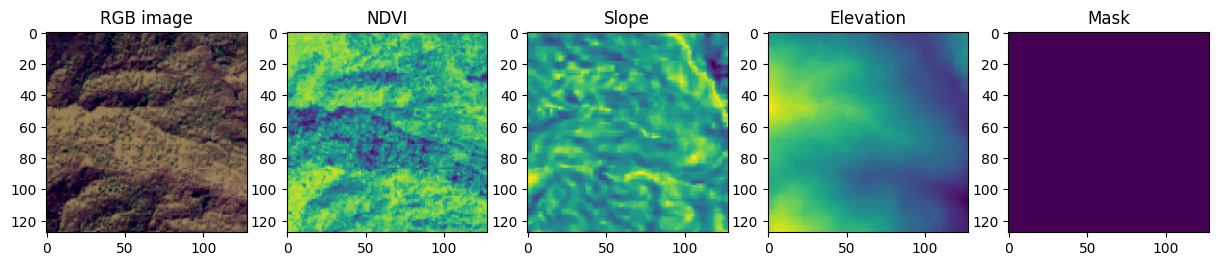

In [16]:
img=1546
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [17]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [18]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


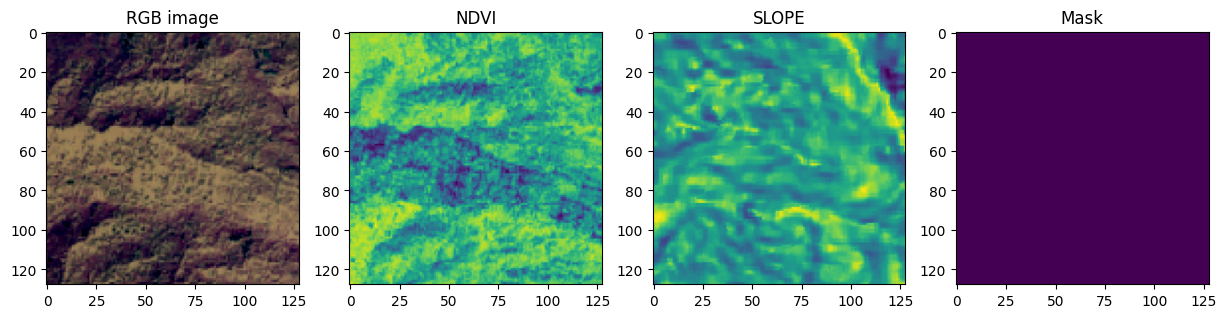

In [19]:
img=1546
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

# Unet Model

In [20]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [21]:


def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [22]:
from tensorflow.keras import backend as K

model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,  
          epochs=30, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_save.h5")




Epoch 1/30



Epoch 1: val_f1_m improved from -inf to 0.59541, saving model to best_model.h5


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


190/190 - 101s - loss: 0.0679 - accuracy: 0.9748 - f1_m: 0.2457 - precision_m: 0.5384 - recall_m: 0.2115 - val_loss: 0.0430 - val_accuracy: 0.9835 - val_f1_m: 0.5954 - val_precision_m: 0.6425 - val_recall_m: 0.5751 - 101s/epoch - 534ms/step
Epoch 2/30

Epoch 2: val_f1_m did not improve from 0.59541
190/190 - 88s - loss: 0.0469 - accuracy: 0.9825 - f1_m: 0.5665 - precision_m: 0.6784 - recall_m: 0.5142 - val_loss: 0.0406 - val_accuracy: 0.9848 - val_f1_m: 0.5547 - val_precision_m: 0.7523 - val_recall_m: 0.4477 - 88s/epoch - 463ms/step
Epoch 3/30

Epoch 3: val_f1_m improved from 0.59541 to 0.62694, saving model to best_model.h5
190/190 - 91s - loss: 0.0413 - accuracy: 0.9845 - f1_m: 0.5970 - precision_m: 0.7290 - recall_m: 0.5239 - val_loss: 0.0364 - val_accuracy: 0.9856 - val_f1_m: 0.6269 - val_precision_m: 0.7156 - val_recall_m: 0.5720 - 91s/epoch - 477ms/step
Epoch 4/30

Epoch 4: val_f1_m improved from 0.62694 to 0.63191, saving model to best_model.h5
190/190 - 85s - loss: 0.0382 - acc

In [23]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.02953336387872696 0.988345205783844 0.7184858918190002 0.7590222954750061 0.6853707432746887


# Prediction

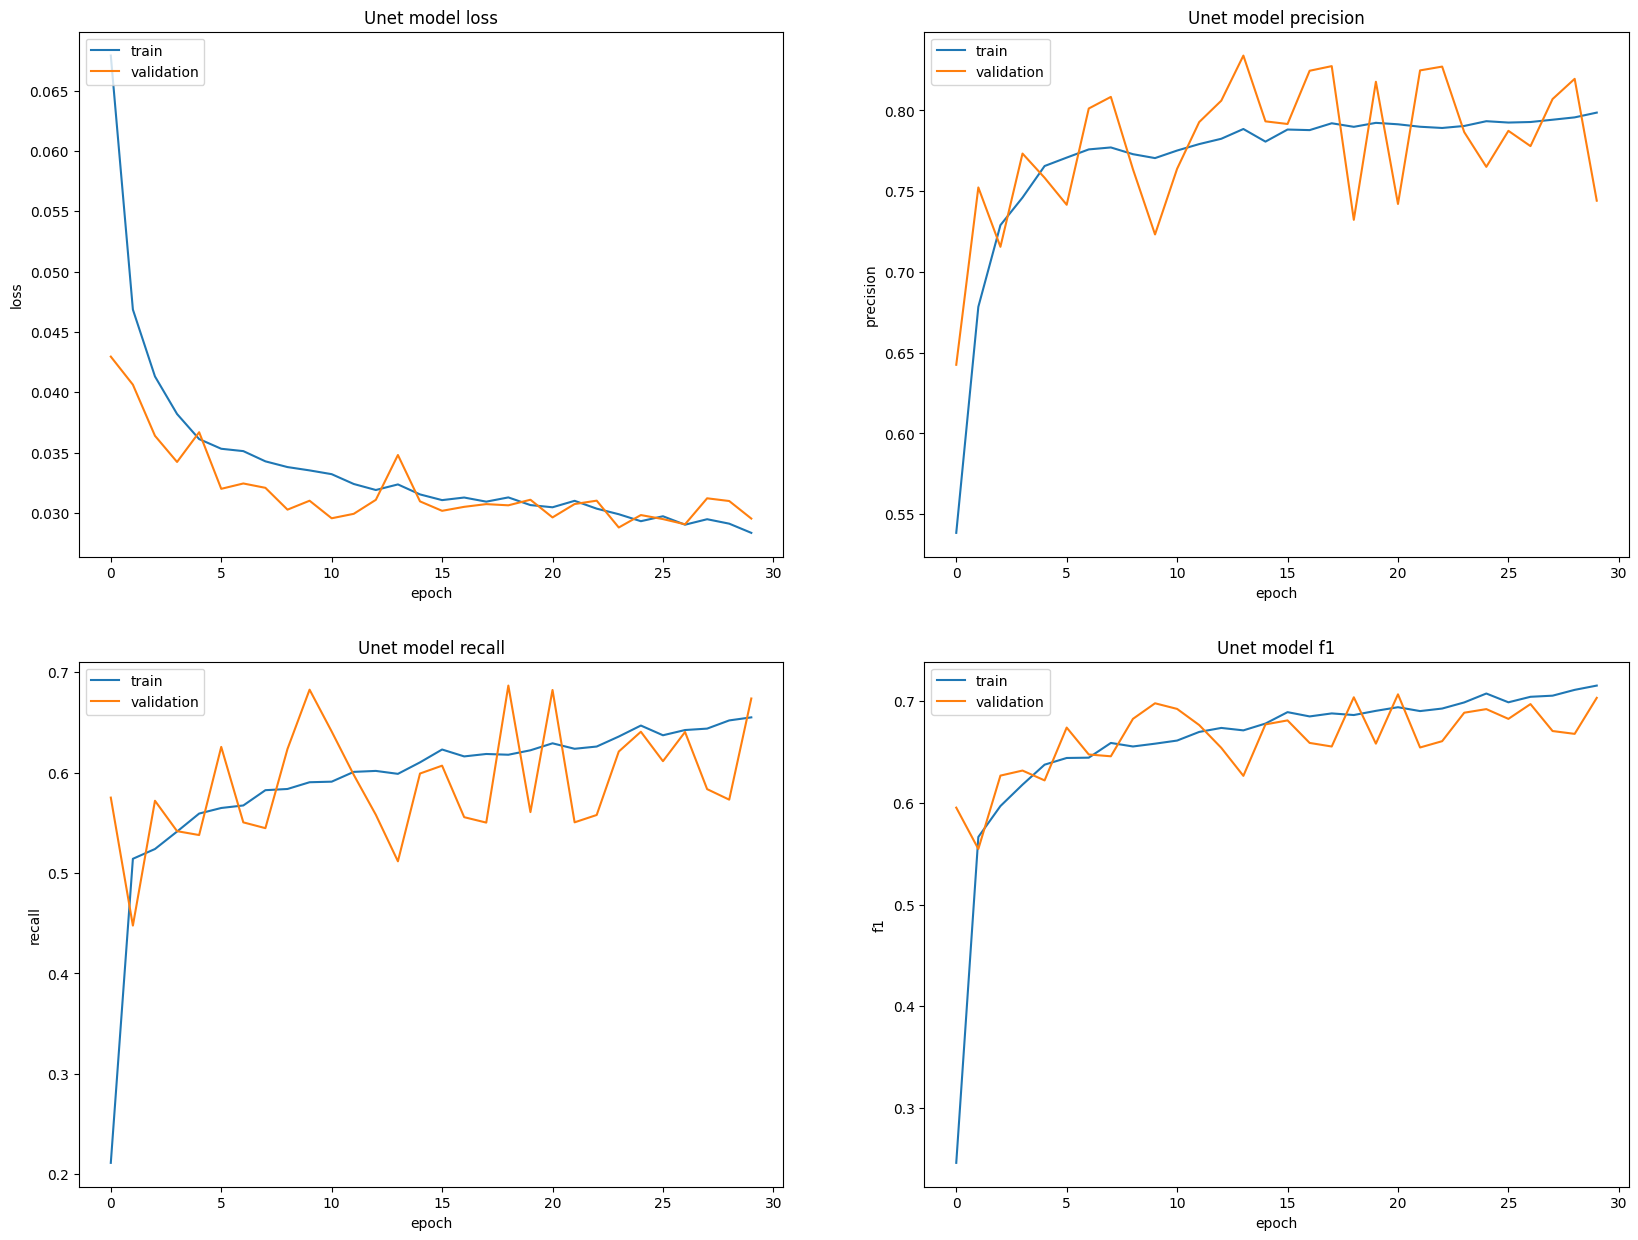

In [24]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [25]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 [==============================] - 5s 200ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

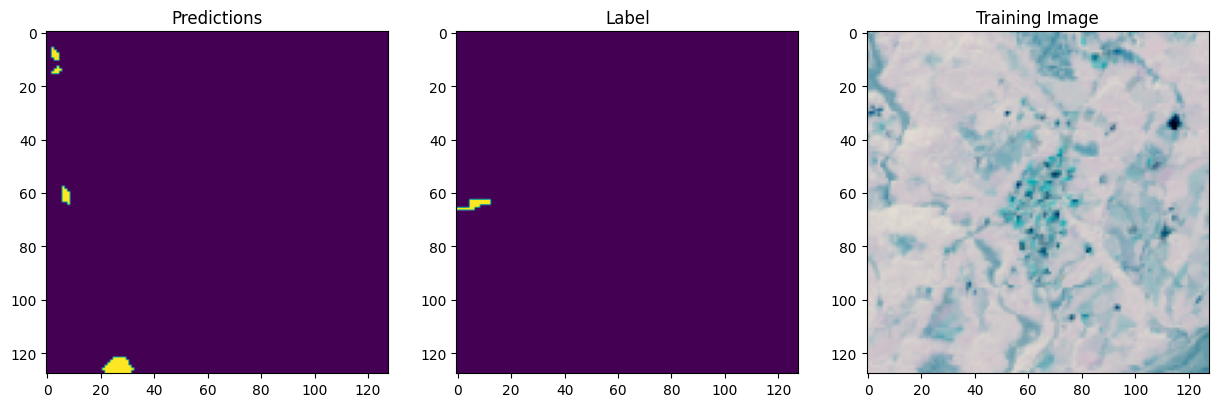

In [26]:
img = 160
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

# Validation data 

In [27]:
validation_url = r'C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\\*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_1.h5
1 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_10.h5
2 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_100.h5
3 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_101.h5
4 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_102.h5
5 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_103.h5
6 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_104.h5
7 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_105.h5
8 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_106.h5
9 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_107.h5
10 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_108.h5
11 C:\\Users

C:\Users\myada\AppData\Local\Temp\ipykernel_19608\1280533386.py:24: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


165 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_27.h5
166 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_28.h5
167 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_29.h5
168 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_3.h5
169 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_30.h5
170 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_31.h5
171 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_32.h5
172 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_33.h5
173 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_34.h5
174 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_35.h5
175 C:\\Users\\myada\\OneDrive\\Desktop\\Satelite_Segmentation\\ValidData\\img\image_36.h5


## Prediction for validation data

In [28]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 [==============================] - 2s 197ms/step


(245, 128, 128, 1)

## Visualization of validation image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

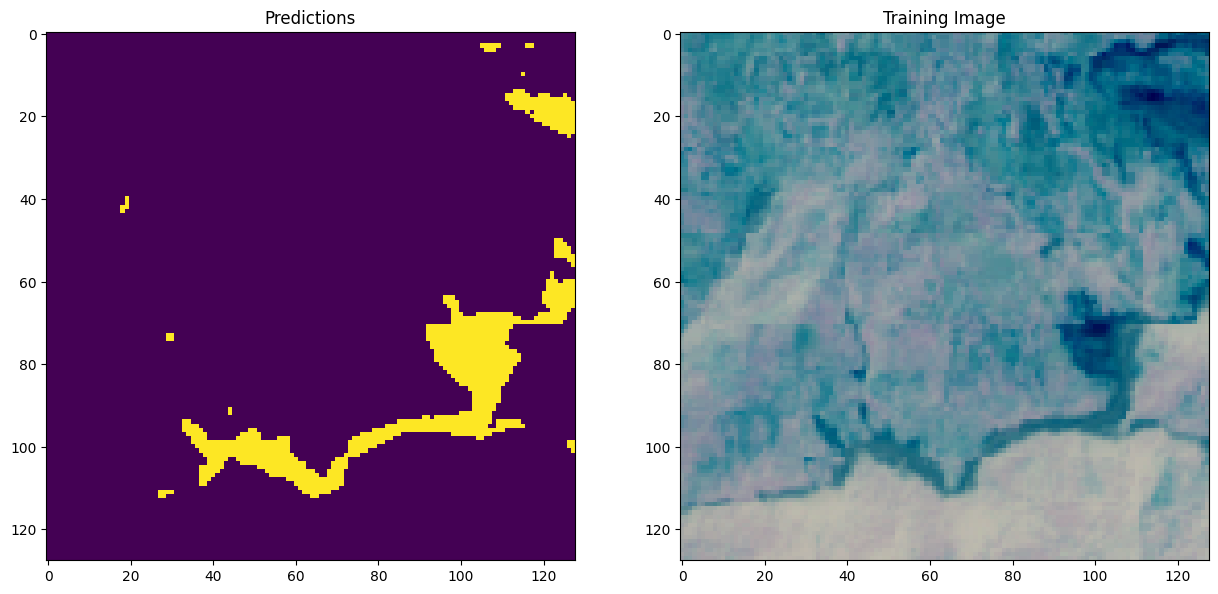

In [29]:
img = 144
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')